# Import packages

In [39]:
import numpy as np # numerical computation
import pandas as pd # # data processing/manipulation
import matplotlib.pyplot as plt # basic data visualization
import seaborn as sns # nicer data visualization
import time
from matplotlib.pyplot import figure

import nltk  
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob

# for aspect based sentiment analysis
# from transformers import AutoTokenizer, AutoModelForSequenceClassification
# import torch.nn.functional as F
# from transformers import pipeline

In [2]:
pd.options.display.max_colwidth = 1000 #by default, Python will likely display only the first 50 characters from a long text
#pd.options.display.float_format = '{:20,.f}'.format
pd.options.display.float_format = '{:,.2f}'.format

### Read Data

In [3]:
tweets_df = pd.read_csv('sample_cleaned.csv',)
tweets_df.head()

,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_lang,tweet_new,tweet_token,ds
0,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch This is how #Biden made his ! #TrumpIsNotAmerica !\nhttps://t.co/uBqAFU86Ip,0,0,-2147483648,1536,Golden Valley Arizona,46.30,-109.17,NaN,United States,North America,Montana,MT,en,this is how biden made his trumpisnotamerica,"['', 'biden', 'made', 'trumpisnotamerica', '']",biden
1,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #BidenEmail #Corruption https://t.co/C6clrtshQl,1,0,-2147483648,390,"California, USA",36.70,-118.76,NaN,United States,North America,California,CA,en,censorship hunterbiden biden bidenemails bidenemail corruption,"['censorship', 'hunterbiden', 'biden', 'bidenemail', 'bidenemail', 'corrupt', '']",biden
2,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORED by Twitter to manipulate a US election in favor of #JoeBiden and against #Trump.\n\nbut CCP from #China or porn on Twitter? \n\nThat’s always been fine for @jack @vijaya @dickc @KatieS.\n\n@marciadorsey is @jack sick?",0,0,19940334,1397,"Chicago, Illinois",41.88,-87.62,Chicago,United States,North America,Illinois,IL,en,in 2020 nypost is being censorship censored by twitter to manipulate a us election in favor of joebiden and against trump but ccp from china or porn on twitter that s always been fine for is sick,"['2020', 'nypost', 'censorship', 'censor', 'twitter', 'manipul', 'u', 'elect', 'favor', 'joebiden', 'trump', 'ccp', 'china', 'porn', 'twitter', 'alway', 'fine', 'sick', '']",biden
3,2020-10-15 00:00:57,"FBI Allegedly Obtained Hunter Biden Computer, Data on Ukraine Dealings, Report Claims #JoeBiden #HunterBiden https://t.co/pDNmB0NqRU",0,0,-2147483648,266,"Kentucky, USA",37.57,-85.16,NaN,United States,North America,Kentucky,KY,en,fbi allegedly obtained hunter biden computer data on ukraine dealings report claims joebiden hunterbiden,"['fbi', 'allegedli', 'obtain', 'hunter', 'biden', 'comput', 'data', 'ukrain', 'deal', 'report', 'claim', 'joebiden', 'hunterbiden', '']",biden
4,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how Ruthless China is?"" https://t.co/QevK00yhs3 #China #HunterBiden #JoeBiden #BidenHarris #BidenHarris2020 #TrumpPence2020 #Trump #realDonaldTrump #WTO #coronavirus #trade https://t.co/Wjm1hyTFNZ",0,0,101659277,83,"Tampa, Florida",27.95,-82.46,Tampa,United States,North America,Florida,FL,en,comments on this do democrats understand how ruthless china is china hunterbiden joebiden bidenharris bidenharris2020 trumppence2020 trump realdonaldtrump wto coronavirus trade,"['comment', 'democrat', 'understand', 'ruthless', 'china', 'china', 'hunterbiden', 'joebiden', 'bidenharri', 'bidenharris2020', 'trumppence2020', 'trump', 'realdonaldtrump', 'wto', 'coronaviru', 'trade', '']",biden


In [4]:
tweets_df.head(10)[['tweet', 'tweet_new']]

,tweet,tweet_new
0,@IslandGirlPRV @BradBeauregardJ @MeidasTouch This is how #Biden made his ! #TrumpIsNotAmerica !\nhttps://t.co/uBqAFU86Ip,this is how biden made his trumpisnotamerica
1,#censorship #HunterBiden #Biden #BidenEmails #BidenEmail #Corruption https://t.co/C6clrtshQl,censorship hunterbiden biden bidenemails bidenemail corruption
2,"In 2020, #NYPost is being #censorship #CENSORED by Twitter to manipulate a US election in favor of #JoeBiden and against #Trump.\n\nbut CCP from #China or porn on Twitter? \n\nThat’s always been fine for @jack @vijaya @dickc @KatieS.\n\n@marciadorsey is @jack sick?",in 2020 nypost is being censorship censored by twitter to manipulate a us election in favor of joebiden and against trump but ccp from china or porn on twitter that s always been fine for is sick
3,"FBI Allegedly Obtained Hunter Biden Computer, Data on Ukraine Dealings, Report Claims #JoeBiden #HunterBiden https://t.co/pDNmB0NqRU",fbi allegedly obtained hunter biden computer data on ukraine dealings report claims joebiden hunterbiden
4,"Comments on this? ""Do Democrats Understand how Ruthless China is?"" https://t.co/QevK00yhs3 #China #HunterBiden #JoeBiden #BidenHarris #BidenHarris2020 #TrumpPence2020 #Trump #realDonaldTrump #WTO #coronavirus #trade https://t.co/Wjm1hyTFNZ",comments on this do democrats understand how ruthless china is china hunterbiden joebiden bidenharris bidenharris2020 trumppence2020 trump realdonaldtrump wto coronavirus trade
5,"In an effort to find the truth about allegations that @Twitter isn't allowing people to share the link to a @nypost article about Hunter Biden, this is what popped up #NYPost #HunterBiden #Biden #Election2020 https://t.co/yYImdZrOKz",in an effort to find the truth about allegations that isn t allowing people to share the link to a article about hunter biden this is what popped up nypost hunterbiden biden election2020
6,Twitter is doing everything they can to help Democrats win the election. Making sure nobody sees a negative story about Biden. Only Negative stories on Trump. #TwitterCensorship #Biden #Ukraine #HunterBiden https://t.co/dbLKQBMvRU,twitter is doing everything they can to help democrats win the election making sure nobody sees a negative story about biden only negative stories on trump twittercensorship biden ukraine hunterbiden
7,#JoeBiden calls him a lier and then insults him for being overweight. Biden shows his low IQ daily. Maybe Joe should hold town halls in kindergarten. He’ll be amongst equals and no one will say anything when he takes his afternoon nap https://t.co/Mr2nh102nG,joebiden calls him a lier and then insults him for being overweight biden shows his low iq daily maybe joe should hold town halls in kindergarten he ll be amongst equals and no one will say anything when he takes his afternoon nap
8,#Trump is tearing up #Biden at the #TrumpRally over the #HunterBidenEmails,trump is tearing up biden at the trumprally over the hunterbidenemails
9,#Trump #Obama #Clinton #Biden\n\n#ManWomanPersonCameraTV\n\n#RockPaperScissors\n\n#HandsFaceSpace\n\n#VoteJoeBiden \n\n#USElection #USElection2020\n\n#Pence vs #Harris\n\n#DrugsTest #TrumpDrugs #BidenDrugs\n\n#InjectDisinfectant #PowerfulLight through the skin or some other way 😳🙆🏽‍♂️🤷🏽‍♂️🤦🏽‍♂️ https://t.co/tBqSpgWoR0,trump obama clinton biden manwomanpersoncameratv rockpaperscissors handsfacespace votejoebiden uselection uselection2020 pence vs harris drugstest trumpdrugs bidendrugs injectdisinfectant powerfullight through the skin or some other way


### TextBlob analysis

In [5]:
# Helper Function to assign Label for Sentiment Analysis with TextBlob
def create_sentiment_labels(value):
    '''
    in: 
        value on which to classify
    out: 
        return the sentiment class
    '''
    if value > 0:
        return 'positive'
    elif value == 0:
        return 'neutral'
    else:
        return 'negative'

In [6]:
# Polarity and subjectivity
def sentiment_analysis(df):
    dataframe = df.copy()
    dataframe['blob_polarity'] = dataframe['tweet_new'].apply(lambda x: TextBlob(x).sentiment.polarity)
    dataframe['blob_subjectivity'] = dataframe['tweet_new'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
    dataframe['blob_sentiment'] = dataframe['blob_polarity'].apply(create_sentiment_labels)
    return dataframe

In [7]:
tweets_df = sentiment_analysis(tweets_df)
tweets_df.head()

,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,...,continent,state,state_code,tweet_lang,tweet_new,tweet_token,ds,blob_polarity,blob_subjectivity,blob_sentiment
0,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch This is how #Biden made his ! #TrumpIsNotAmerica !\nhttps://t.co/uBqAFU86Ip,0,0,-2147483648,1536,Golden Valley Arizona,46.30,-109.17,NaN,...,North America,Montana,MT,en,this is how biden made his trumpisnotamerica,"['', 'biden', 'made', 'trumpisnotamerica', '']",biden,0.00,0.00,neutral
1,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #BidenEmail #Corruption https://t.co/C6clrtshQl,1,0,-2147483648,390,"California, USA",36.70,-118.76,NaN,...,North America,California,CA,en,censorship hunterbiden biden bidenemails bidenemail corruption,"['censorship', 'hunterbiden', 'biden', 'bidenemail', 'bidenemail', 'corrupt', '']",biden,0.00,0.00,neutral
2,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORED by Twitter to manipulate a US election in favor of #JoeBiden and against #Trump.\n\nbut CCP from #China or porn on Twitter? \n\nThat’s always been fine for @jack @vijaya @dickc @KatieS.\n\n@marciadorsey is @jack sick?",0,0,19940334,1397,"Chicago, Illinois",41.88,-87.62,Chicago,...,North America,Illinois,IL,en,in 2020 nypost is being censorship censored by twitter to manipulate a us election in favor of joebiden and against trump but ccp from china or porn on twitter that s always been fine for is sick,"['2020', 'nypost', 'censorship', 'censor', 'twitter', 'manipul', 'u', 'elect', 'favor', 'joebiden', 'trump', 'ccp', 'china', 'porn', 'twitter', 'alway', 'fine', 'sick', '']",biden,-0.15,0.68,negative
3,2020-10-15 00:00:57,"FBI Allegedly Obtained Hunter Biden Computer, Data on Ukraine Dealings, Report Claims #JoeBiden #HunterBiden https://t.co/pDNmB0NqRU",0,0,-2147483648,266,"Kentucky, USA",37.57,-85.16,NaN,...,North America,Kentucky,KY,en,fbi allegedly obtained hunter biden computer data on ukraine dealings report claims joebiden hunterbiden,"['fbi', 'allegedli', 'obtain', 'hunter', 'biden', 'comput', 'data', 'ukrain', 'deal', 'report', 'claim', 'joebiden', 'hunterbiden', '']",biden,-0.10,0.10,negative
4,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how Ruthless China is?"" https://t.co/QevK00yhs3 #China #HunterBiden #JoeBiden #BidenHarris #BidenHarris2020 #TrumpPence2020 #Trump #realDonaldTrump #WTO #coronavirus #trade https://t.co/Wjm1hyTFNZ",0,0,101659277,83,"Tampa, Florida",27.95,-82.46,Tampa,...,North America,Florida,FL,en,comments on this do democrats understand how ruthless china is china hunterbiden joebiden bidenharris bidenharris2020 trumppence2020 trump realdonaldtrump wto coronavirus trade,"['comment', 'democrat', 'understand', 'ruthless', 'china', 'china', 'hunterbiden', 'joebiden', 'bidenharri', 'bidenharris2020', 'trumppence2020', 'trump', 'realdonaldtrump', 'wto', 'coronaviru', 'trade', '']",biden,-1.00,1.00,negative


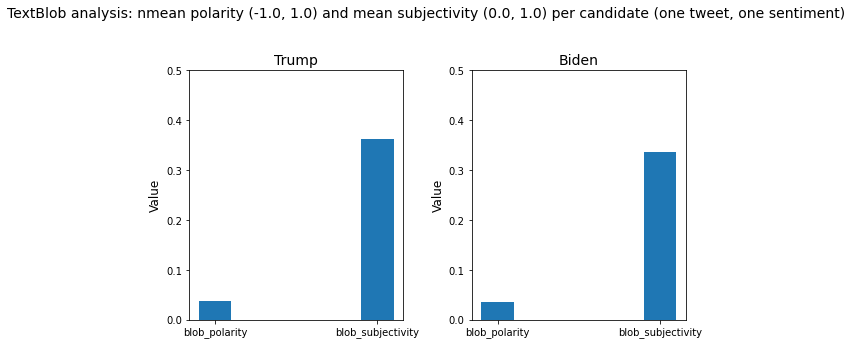

In [8]:
#update the divided dataset
trump_df = tweets_df[tweets_df.ds=='trump']
biden_df = tweets_df[tweets_df.ds=='biden']

fig, axes = plt.subplots(1, 2, figsize=(8,5))

fig.suptitle('TextBlob analysis: nmean polarity (-1.0, 1.0) and mean subjectivity (0.0, 1.0) per candidate (one tweet, one sentiment)', fontsize=14)

features = ['blob_polarity', 'blob_subjectivity']
values = [trump_df.groupby(['user_id'])['blob_polarity'].mean().mean(), trump_df.groupby(['user_id'])['blob_subjectivity'].mean().mean()]
axes[0].bar(features,values, width=0.2)
axes[0].set_ylim(0, .5)
axes[0].set_title('Trump', fontsize = 14)
axes[0].set_ylabel('Value', fontsize = 12)

values = [biden_df.groupby(['user_id'])['blob_polarity'].mean().mean(), biden_df.groupby(['user_id'])['blob_subjectivity'].mean().mean()]
axes[1].bar(features,values, width=0.2)
axes[1].set_ylim(0, .5)
axes[1].set_title('Biden', fontsize = 14)
axes[1].set_ylabel('Value', fontsize = 12)

fig.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()

trump_usa_pol_tweet =trump_df['blob_polarity'].mean()
trump_usa_subj_tweet = trump_df['blob_subjectivity'].mean()
biden_usa_pol_tweet = biden_df['blob_polarity'].mean()
biden_usa_subj_tweet = biden_df['blob_subjectivity'].mean()

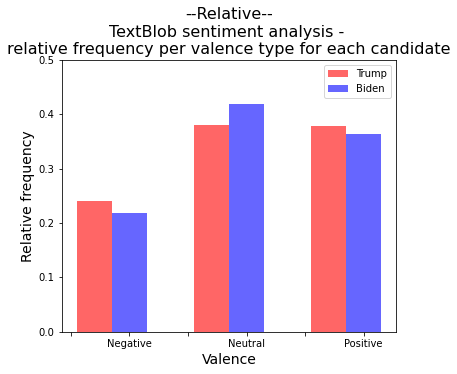

In [9]:
plt.figure(figsize=(6,5))

ax = plt.gca()
ax.set_title('--Relative--\nTextBlob sentiment analysis - \nrelative frequency per valence type for each candidate', fontsize=16)

features = np.array([1,2,3])
trump = (trump_df['blob_sentiment'].sort_values().value_counts()/trump_df['blob_sentiment'].shape[0])[['negative', 'neutral', 'positive']]
ax.bar(features-0.3, trump.values, width=0.3, align = 'center', color = 'r', alpha= .6)

biden = (biden_df['blob_sentiment'].sort_values().value_counts()/biden_df['blob_sentiment'].shape[0])[['negative', 'neutral', 'positive']]
ax.bar(features, biden.values, width=0.3, align = 'center', color = 'b', alpha= .6)

ax.set_ylim(0, .5)
ax.set_xlabel('Valence', fontsize = 14)
ax.set_ylabel('Relative frequency', fontsize = 14)

ax.set_xticklabels(['', '', 'Negative', '', 'Neutral', '', 'Positive'])

labels= ["Trump", "Biden"]
ax.legend(labels)

fig.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()

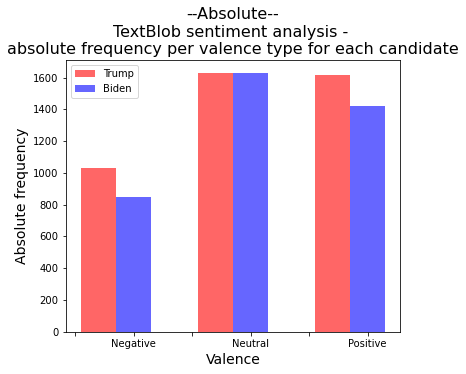

In [10]:
plt.figure(figsize=(6,5))

ax = plt.gca()
ax.set_title('--Absolute--\nTextBlob sentiment analysis - \nabsolute frequency per valence type for each candidate', fontsize=16)

features = np.array([1,2,3])
trump = (trump_df['blob_sentiment'].sort_values().value_counts())[['negative', 'neutral', 'positive']]
ax.bar(features-0.3, trump.values, width=0.3, align = 'center', color = 'r', alpha=0.6)

biden = (biden_df['blob_sentiment'].sort_values().value_counts())[['negative', 'neutral', 'positive']]
ax.bar(features, biden.values, width=0.3, align = 'center', color = 'b', alpha = 0.6)

#ax.set_ylim(0, .5)
ax.set_xlabel('Valence', fontsize = 14)
ax.set_ylabel('Absolute frequency', fontsize = 14)

ax.set_xticklabels(['', '', 'Negative', '', 'Neutral', '', 'Positive'])

labels= ["Trump", "Biden"]
ax.legend(labels)

fig.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()

### Vader Sentiment Analysis

In [11]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
# Run the analysis on clean and unclean data and it is recommended

[nltk_data] Downloading package vader_lexicon to C:\Users\Lu
[nltk_data]     Xinyi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
def sentiment_analysis_vader(data, clean = True):
    df = data.copy()
    if clean:
        target_col = 'tweet_new'
        prefix = 'vader_clean_'
    else:
        target_col = 'tweet'
        prefix = 'vader_'
    
    scores_col = prefix+'scores'
    
    #let's make it vader_sentiment, so that it has the same naming convention as TextBlob and Flair sentiment score
    #compound_col = prefix+'compound'
    compound_col = prefix+'polarity'
    
    #comp_score_col = prefix+'comp_score'
    comp_score_col = prefix+'sentiment' 
    
    df[scores_col] = df[target_col].apply(lambda tweet: sid.polarity_scores(tweet))
    df[compound_col] = df[scores_col].apply(lambda d: d['compound'])
    df[comp_score_col] = df[compound_col].apply(create_sentiment_labels)
    return df

In [13]:
tweets_vader = sentiment_analysis_vader(tweets_df)
tweets_vader = sentiment_analysis_vader(tweets_vader, clean=False)
tweets_vader.head()

,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,...,ds,blob_polarity,blob_subjectivity,blob_sentiment,vader_clean_scores,vader_clean_polarity,vader_clean_sentiment,vader_scores,vader_polarity,vader_sentiment
0,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch This is how #Biden made his ! #TrumpIsNotAmerica !\nhttps://t.co/uBqAFU86Ip,0,0,-2147483648,1536,Golden Valley Arizona,46.30,-109.17,NaN,...,biden,0.00,0.00,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral
1,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #BidenEmail #Corruption https://t.co/C6clrtshQl,1,0,-2147483648,390,"California, USA",36.70,-118.76,NaN,...,biden,0.00,0.00,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral
2,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORED by Twitter to manipulate a US election in favor of #JoeBiden and against #Trump.\n\nbut CCP from #China or porn on Twitter? \n\nThat’s always been fine for @jack @vijaya @dickc @KatieS.\n\n@marciadorsey is @jack sick?",0,0,19940334,1397,"Chicago, Illinois",41.88,-87.62,Chicago,...,biden,-0.15,0.68,negative,"{'neg': 0.141, 'neu': 0.76, 'pos': 0.099, 'compound': -0.4019}",-0.40,negative,"{'neg': 0.103, 'neu': 0.811, 'pos': 0.086, 'compound': -0.4137}",-0.41,negative
3,2020-10-15 00:00:57,"FBI Allegedly Obtained Hunter Biden Computer, Data on Ukraine Dealings, Report Claims #JoeBiden #HunterBiden https://t.co/pDNmB0NqRU",0,0,-2147483648,266,"Kentucky, USA",37.57,-85.16,NaN,...,biden,-0.10,0.10,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral
4,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how Ruthless China is?"" https://t.co/QevK00yhs3 #China #HunterBiden #JoeBiden #BidenHarris #BidenHarris2020 #TrumpPence2020 #Trump #realDonaldTrump #WTO #coronavirus #trade https://t.co/Wjm1hyTFNZ",0,0,101659277,83,"Tampa, Florida",27.95,-82.46,Tampa,...,biden,-1.00,1.00,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral


In [14]:
trump_df = tweets_vader[tweets_vader.ds=='trump']
biden_df = tweets_vader[tweets_vader.ds=='biden']
print(trump_df.shape, biden_df.shape)

(4274, 27) (3895, 27)


In [15]:
def get_valence_relative_freq(data):
    df = data.copy()
    grouped = df.groupby(['vader_sentiment'])
    valence = grouped['vader_sentiment'].value_counts(normalize=False, sort=False)
    valence = valence.droplevel(0)
    valence = valence / valence.sum()
    return valence

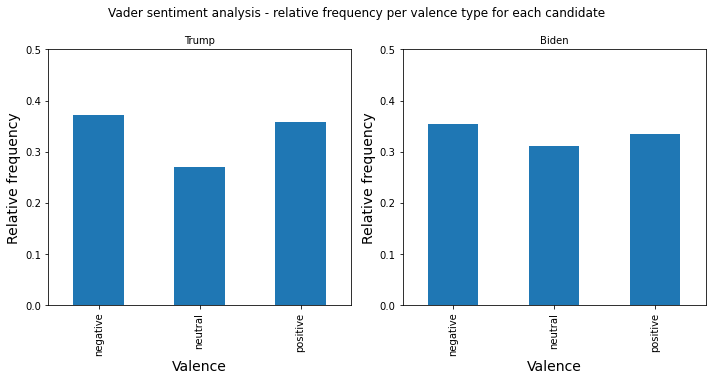

In [16]:
# sns.set_theme(style="darkgrid")
pd.options.display.max_colwidth = 300

trump_tmp = get_valence_relative_freq(trump_df)
biden_tmp = get_valence_relative_freq(biden_df)

#plt.figure(figsize=(8,6))
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Vader sentiment analysis - relative frequency per valence type for each candidate', fontsize=12, y=1.05)
#fig.tight_layout()

#sns.barplot(trump_tmp.index, trump_tmp.values, ax=axes[0])
(trump_tmp).plot(kind='bar', ax = axes[0])
axes[0].set_title('Trump', fontsize = 10)
axes[0].set_xlabel('Valence', fontsize = 14)
axes[0].set_ylabel('Relative frequency', fontsize = 14)
axes[0].set_ylim(0, .5)

#ax2 = sns.countplot(x="comp_score", data=biden_tmp)
#sns.barplot(biden_tmp.index, biden_tmp.values,  ax=axes[1])
(biden_tmp).plot(kind='bar', ax = axes[1])
axes[1].set_title('Biden', fontsize = 10)
axes[1].set_xlabel('Valence', fontsize = 14)
axes[1].set_ylabel('Relative frequency', fontsize = 14)
axes[1].set_ylim(0, .5)

plt.tight_layout()
plt.show()

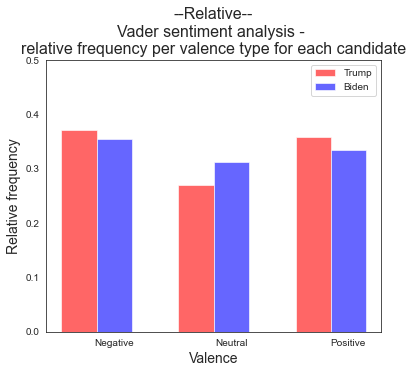

In [73]:
plt.figure(figsize=(6,5))
sns.set_style("white")

ax = plt.gca()
ax.set_title('--Relative--\nVader sentiment analysis - \nrelative frequency per valence type for each candidate', fontsize=16)

features = np.array([1,2,3])

trump = get_valence_relative_freq(trump_df)
ax.bar(features-0.3, trump.values, width=0.3, align = 'center', color = 'r', alpha= .6)

biden = get_valence_relative_freq(biden_df)
ax.bar(features, biden.values, width=0.3, align = 'center', color = 'b', alpha= .6)

ax.set_ylim(0, .5)
ax.set_xlabel('Valence', fontsize = 14)
ax.set_ylabel('Relative frequency', fontsize = 14)

ax.set_xticklabels(['', '', 'Negative', '', 'Neutral', '', 'Positive'])

labels= ["Trump", "Biden"]
ax.legend(labels)

fig.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()

### Average sentiment score per candidate

-0.011322976134768348
-0.009924775353016665


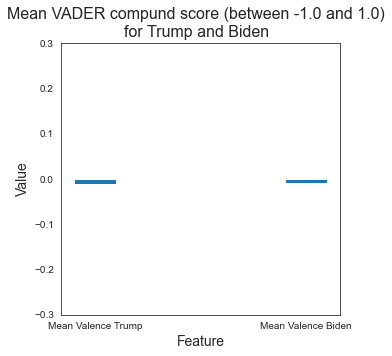

In [18]:
print(trump_df['vader_polarity'].mean())
print(biden_df['vader_polarity'].mean())

fig = plt.figure(figsize=(5,5))

fig.suptitle('Mean VADER compund score (between -1.0 and 1.0)\nfor Trump and Biden', fontsize=16)

features = ['Mean Valence Trump', 'Mean Valence Biden']
values = [trump_df['vader_polarity'].mean(), biden_df['vader_polarity'].mean()]

plt.bar(features,values, width=0.2)

axes = plt.gca()
axes.set_ylim(-.3, .3)
axes.set_xlabel('Feature', fontsize = 14)
axes.set_ylabel('Value', fontsize = 14)

plt.show()

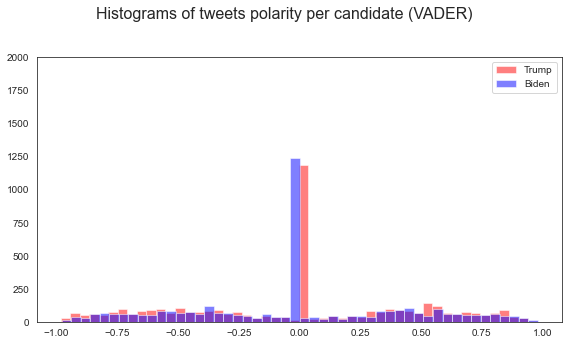

In [19]:
bins = 50

fig = plt.figure(figsize=(8,5))
fig.suptitle('Histograms of tweets polarity per candidate (VADER)', fontsize=16)

plt.hist(trump_df['vader_polarity'], bins = bins, alpha = 0.5, color = 'r')
plt.hist(biden_df['vader_polarity'], bins = bins, alpha = 0.5, color = 'b')

axes = plt.gca()
axes.set_ylim(0, 2000)
labels= ["Trump", "Biden"]
axes.legend(labels)

fig.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()

### Aspect based sentiment analysis

In [ ]:
# Load Aspect-Based Sentiment Analysis model
absa_tokenizer = AutoTokenizer.from_pretrained("yangheng/deberta-v3-base-absa-v1.1")
absa_model = AutoModelForSequenceClassification \
  .from_pretrained("yangheng/deberta-v3-base-absa-v1.1")

In [ ]:
def compute_absa_scores(tweet, apsect):
    inputs = absa_tokenizer(f"[CLS] {tweet} [SEP] {tweet} [SEP]", return_tensors="pt")
    outputs = absa_model(**inputs)
    probs = F.softmax(outputs.logits, dim=1)
    probs = probs.detach().numpy()[0]
    max_prob = max(probs)
    index = probs.index(max_prob)
    if index == 0:
        return "negative"
    elif index == 1:
        return "neutral"
    else:
        return "positive"

In [ ]:
def ABSA(data, aspect):
    df = data.copy()
    df['absa_sentiment'] = df.apply(lambda x: compute_absa_scores(x['tweet_new'], aspect), axis=1)
    return df

### Input data and run code to get sentiment scores

In [20]:
week1 = pd.read_csv('sample_week1.csv')
week2 = pd.read_csv('sample_week2.csv')
week3 = pd.read_csv('sample_week3.csv')
print(week1.shape, week2.shape, week3.shape)

(6382, 18) (5935, 18) (5310, 18)


In [21]:
week1_sentiments = sentiment_analysis(week1)
week1_sentiments = sentiment_analysis_vader(week1_sentiments)
week1_sentiments = sentiment_analysis_vader(week1_sentiments, clean=False)
# week1_sentiments = ABSA(week1_sentiments, "covid")
week1_sentiments.head()

,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,...,ds,blob_polarity,blob_subjectivity,blob_sentiment,vader_clean_scores,vader_clean_polarity,vader_clean_sentiment,vader_scores,vader_polarity,vader_sentiment
0,2020-10-19 23:12:12,Is it just me or does anyone else really doubt that #Trump had covid and that it was just an excuse to get attention?,0,0,-2147483648,960,"Los Angeles, CA",34.05,-118.24,Los Angeles,...,trump,0.08,0.12,positive,"{'neg': 0.107, 'neu': 0.843, 'pos': 0.05, 'compound': -0.3597}",-0.36,negative,"{'neg': 0.107, 'neu': 0.843, 'pos': 0.05, 'compound': -0.3597}",-0.36,negative
1,2020-10-17 10:16:10,#Trump says he may leave the US if Biden wins. #Politics #BidenHarris2020 https://t.co/6pRzm3FQlw,7,0,18080729,21518,"New York, NY",40.71,-74.01,New York,...,trump,0.30,0.20,positive,"{'neg': 0.081, 'neu': 0.671, 'pos': 0.248, 'compound': 0.5423}",0.54,positive,"{'neg': 0.075, 'neu': 0.692, 'pos': 0.233, 'compound': 0.5423}",0.54,positive
2,2020-10-19 10:00:04,"@StephenKing You, @realDonaldTrump, a US president, said it.\nMillions heard it not knowing what it meant.\nOr knew what it meant &amp; didn't care.\nAs a black man in America, I care.\nEvery person of color should care.\nCare &amp; read &amp; retweet.\n#Trump #RacehorseTheory #eugenics\nhttps:/...",0,1,-2147483648,411,"Littleton, CO",39.61,-105.02,NaN,...,trump,-0.17,0.43,negative,"{'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'compound': 0.9153}",0.92,positive,"{'neg': 0.154, 'neu': 0.783, 'pos': 0.063, 'compound': -0.5696}",-0.57,negative
3,2020-10-18 17:14:19,Be prepared! We know #Democrats have saved their most disgusting vile puke inducing smears and lies for these last two weeks. It will be 24/7 Sick twisted #Trump Hate ALL day EVERY day. Kinda like it's been since 2016 only on steroids till Nov 3rd. It's gonna be,5,4,9834992,64658,"Memphis, TN",35.15,-90.05,Memphis,...,trump,-0.31,0.67,negative,"{'neg': 0.319, 'neu': 0.578, 'pos': 0.102, 'compound': -0.9488}",-0.95,negative,"{'neg': 0.322, 'neu': 0.576, 'pos': 0.102, 'compound': -0.9511}",-0.95,negative
4,2020-10-19 04:51:02,"In ""Edward Scissorhands"", Johnny Depp only spoke 169 words in the complete movie. #facts #funfacts #DonaldTrump #Republicans #News",2,0,391503406,3310,"Utah, USA",39.42,-111.71,NaN,...,trump,0.05,0.70,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral


In [22]:
week2_sentiments = sentiment_analysis(week2)
week2_sentiments = sentiment_analysis_vader(week2_sentiments)
week2_sentiments = sentiment_analysis_vader(week2_sentiments, clean=False)
week2_sentiments.head()

,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,...,ds,blob_polarity,blob_subjectivity,blob_sentiment,vader_clean_scores,vader_clean_polarity,vader_clean_sentiment,vader_scores,vader_polarity,vader_sentiment
0,2020-10-22 00:08:37,Opinion | Let’s not mince words. The Trump administration kidnapped children. https://t.co/Ivzesmbqus #Immigration #Trump #Children #Kids #DHS #Barr,0,0,118058516,881,New York NY,40.71,-74.01,New York,...,trump,0.00,0.00,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral
1,2020-10-21 03:23:00,Can I #writein Baby Yoda for President #2020? 💯\n#babyyoda #president #babyyodaforpresident #whitehouse #trump #biden #meme #america #starwars #georgelucas #yoda #government #election2020 #jpm #jackiepearlmedia #idiocracy #usetheforce https://t.co/4Dpw31qBc1,1,1,-2147483648,10,"Portland, OR",45.52,-122.67,Portland,...,trump,0.00,0.00,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral
2,2020-10-26 18:28:41,@SethAbramson #Trump fails to see why the stock market he claims he made go up can go down by what he failed to do \n\n#Market sees worsening economy ahead as cases &amp; deaths surge \n\nTrump thinks media coverage of #Covid19 is planned prefers avoid subject while babbling\n\nhttps://t.co/KE1p...,0,0,-2147483648,3105,California,36.70,-118.76,NaN,...,trump,-0.33,0.31,negative,"{'neg': 0.212, 'neu': 0.788, 'pos': 0.0, 'compound': -0.8834}",-0.88,negative,"{'neg': 0.204, 'neu': 0.796, 'pos': 0.0, 'compound': -0.8834}",-0.88,negative
3,2020-10-20 16:40:17,"#Trump keeps telling you we've rounded the corner. We haven't. #COVID19 is getting even worse. 60,000 people per day are getting sick! AND he's trying to get rid of #PreExistingConditions in court. No plan. No conscience. #VoteThemAllOut",0,0,30404055,165,"Orange County, CA",33.75,-117.87,NaN,...,trump,-0.56,0.73,negative,"{'neg': 0.236, 'neu': 0.764, 'pos': 0.0, 'compound': -0.8689}",-0.87,negative,"{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'compound': -0.8777}",-0.88,negative
4,2020-10-23 00:43:11,"@kimbersaaa YUP! If you’re STILL undecided after the last 4 years of FAILURES, BROKEN promises, MOST ESPECIALLY the over 220,000 deaths in a pandemic, #DonaldTrump NOT owning up to ANY of it, etc. Something is EXTREMELY WRONG with you! #VoteBidenHarris2020 💙 #VoteBidenHarrisToSaveAmerica 🇺🇸",0,1,-2147483648,2050,"New York, NY. L.E.S, Baby!",40.71,-74.01,New York,...,trump,-0.08,0.57,negative,"{'neg': 0.233, 'neu': 0.714, 'pos': 0.053, 'compound': -0.8313}",-0.83,negative,"{'neg': 0.284, 'neu': 0.667, 'pos': 0.05, 'compound': -0.9233}",-0.92,negative


In [23]:
week3_sentiments = sentiment_analysis(week3)
week3_sentiments = sentiment_analysis_vader(week3_sentiments)
week3_sentiments = sentiment_analysis_vader(week3_sentiments, clean=False)
week3_sentiments.head()

,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,...,ds,blob_polarity,blob_subjectivity,blob_sentiment,vader_clean_scores,vader_clean_polarity,vader_clean_sentiment,vader_scores,vader_polarity,vader_sentiment
0,2020-10-27 17:07:54,"Wonder how long politicians like #EmmanuelMacron ,#DonaldTrump #modifailsindia #jair #Bolsonaro shall hide their ""performance"" behind issue like #Islamophobia #Rasim and #nationalism \nHow long they will blame others",0,0,932320676,162,planet Earth,34.23,-102.41,NaN,...,trump,-0.17,0.50,negative,"{'neg': 0.128, 'neu': 0.717, 'pos': 0.156, 'compound': 0.2263}",0.23,positive,"{'neg': 0.128, 'neu': 0.717, 'pos': 0.156, 'compound': 0.2263}",0.23,positive
1,2020-10-31 23:31:11,@realDonaldTrump Anti-Trump? PLEASE VOTE #MakeAmericaUnitedAgain #vetsforscience #FTrumpS #OperationMAGA #antitrump #dumptrump #biden2020 #trump #voteblue #negligenthomicide #blm #murdererinchief #bidenharris #shitler #FuckTrumpsShit https://t.co/EN4WEs0GuU,0,0,-2147483648,89,"Berkeley, CA",37.87,-122.27,Berkeley,...,trump,0.00,0.00,neutral,"{'neg': 0.106, 'neu': 0.787, 'pos': 0.106, 'compound': 0.0}",0.00,neutral,"{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'compound': 0.4648}",0.46,positive
2,2020-10-27 22:36:01,For God's 🙏 sake. #Trump's wife can barely speak English! 🌊🇺🇲🌊 #Biden #TrumpMeltdown #Biden2020 #DonTheCon https://t.co/Ebznx0ZdQv,0,0,77080568,1001,"Annapolis, Maryland",38.98,-76.49,Annapolis,...,trump,0.03,0.05,positive,"{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.2732}",0.27,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral
3,2020-10-28 07:24:04,@RealDonalDrumpf @OperationMAGA Many people are saying this is #FakeNews and another #DemocratHoax! Those people - were NOT left in the dark - in the middle of nowhere - in frigid weather! They like to celebrate like that at my rallies!\n\n#TrumpRallyOmaha\n#Trump\n#Omaha https://t.co/xXEQ0Kh5gF,1,0,306055499,4853,"San Antonio, TX",29.42,-98.50,San Antonio,...,trump,-0.11,0.38,negative,"{'neg': 0.0, 'neu': 0.801, 'pos': 0.199, 'compound': 0.8271}",0.83,positive,"{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'compound': 0.8617}",0.86,positive
4,2020-10-30 15:06:29,"#Trump's likely to contest election results in PA, GA, NC, TX with ""rigged""​ machines charges. #Election2020\nhttps://t.co/ex1A4E4aWz",2,2,18229950,1992,"Washington, D.C.",38.89,-77.04,Washington,...,trump,0.00,1.00,neutral,"{'neg': 0.229, 'neu': 0.647, 'pos': 0.124, 'compound': -0.2732}",-0.27,negative,"{'neg': 0.103, 'neu': 0.738, 'pos': 0.159, 'compound': 0.2808}",0.28,positive


In [24]:
### group by to get average sentiment score
week1_sentiments['created_at'] = pd.to_datetime(week1_sentiments['created_at'])
week1_grouped = week1_sentiments.groupby([week1_sentiments['created_at'].dt.date, 'ds'])['vader_polarity'].mean().reset_index()
week2_sentiments['created_at'] = pd.to_datetime(week2_sentiments['created_at'])
week2_grouped = week2_sentiments.groupby([week2_sentiments['created_at'].dt.date, 'ds'])['vader_polarity'].mean().reset_index()
week3_sentiments['created_at'] = pd.to_datetime(week3_sentiments['created_at'])
week3_grouped = week3_sentiments.groupby([week3_sentiments['created_at'].dt.date, 'ds'])['vader_polarity'].mean().reset_index()
week1_grouped.head()

,created_at,ds,vader_polarity
0,2020-10-15,biden,-0.02
1,2020-10-15,trump,-0.07
2,2020-10-16,biden,0.05
3,2020-10-16,trump,-0.02
4,2020-10-17,biden,0.02


In [25]:
week1_grouped.tail()

,created_at,ds,vader_polarity
5,2020-10-17,trump,-0.01
6,2020-10-18,biden,0.01
7,2020-10-18,trump,-0.03
8,2020-10-19,biden,0.04
9,2020-10-19,trump,-0.02


In [26]:
polarity_grouped = pd.concat([week1_grouped, week2_grouped, week3_grouped], ignore_index=True)
polarity_grouped.head()

,created_at,ds,vader_polarity
0,2020-10-15,biden,-0.02
1,2020-10-15,trump,-0.07
2,2020-10-16,biden,0.05
3,2020-10-16,trump,-0.02
4,2020-10-17,biden,0.02


In [27]:
polarity_grouped.tail()

,created_at,ds,vader_polarity
33,2020-10-31,trump,0.05
34,2020-11-01,biden,0.02
35,2020-11-01,trump,-0.00
36,2020-11-02,biden,0.10
37,2020-11-02,trump,0.01


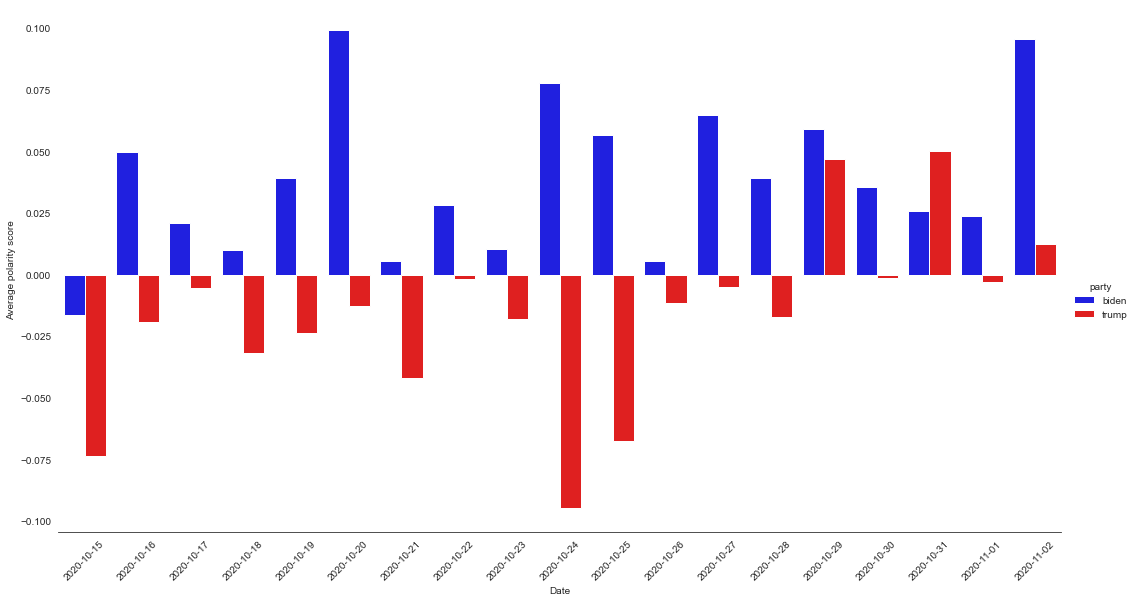

In [28]:
colors = ['#0000FF', '#FF0000']
sns.set_palette(sns.color_palette(colors))

g = sns.catplot(data = polarity_grouped, 
               kind = 'bar', 
               x = 'created_at', y = 'vader_polarity', hue = 'ds', 
                height=8, aspect=15/8)
g.despine(left=True)
g.set_axis_labels('Date', 'Average polarity score')
g._legend.set_title('party')
g.set_xticklabels(rotation=45)

In [29]:
#proportion of positive/negative tweets
week1_count = week1_sentiments.groupby([week1_sentiments['created_at'].dt.date, 'ds', 'vader_sentiment']).size().reset_index().rename(columns={0:'count'})
week1_total = week1_sentiments.groupby([week1_sentiments['created_at'].dt.date, 'ds']).size().reset_index().rename(columns={0: 'total_ds'})
week1_df = week1_count.merge(week1_total, how = 'left', on = ['created_at', 'ds'])
week1_df['proportion_ds'] = week1_df['count']/week1_df['total_ds']
week1_positive = week1_df[week1_df['vader_sentiment'] == 'positive']
week1_positive

,created_at,ds,vader_sentiment,count,total_ds,proportion_ds
2,2020-10-15,biden,positive,246,728,0.34
5,2020-10-15,trump,positive,207,601,0.34
8,2020-10-16,biden,positive,410,992,0.41
11,2020-10-16,trump,positive,332,853,0.39
14,2020-10-17,biden,positive,220,530,0.42
17,2020-10-17,trump,positive,194,506,0.38
20,2020-10-18,biden,positive,200,530,0.38
23,2020-10-18,trump,positive,184,519,0.35
26,2020-10-19,biden,positive,203,521,0.39
29,2020-10-19,trump,positive,220,602,0.37


In [30]:
#proportion of positive/negative tweets
week2_sentiments['created_at'] = pd.to_datetime(week2_sentiments['created_at'])
week2_count = week2_sentiments.groupby([week2_sentiments['created_at'].dt.date, 'ds', 'vader_sentiment']).size().reset_index().rename(columns={0:'count'})
week2_total = week2_sentiments.groupby([week2_sentiments['created_at'].dt.date, 'ds']).size().reset_index().rename(columns={0: 'total_ds'})
week2_df = week2_count.merge(week2_total, how = 'left', on = ['created_at', 'ds'])
week2_df['proportion_ds'] = week2_df['count']/week2_df['total_ds']
week2_positive = week2_df[week2_df['vader_sentiment'] == 'positive']
week2_positive

,created_at,ds,vader_sentiment,count,total_ds,proportion_ds
2,2020-10-20,biden,positive,127,280,0.45
5,2020-10-20,trump,positive,126,340,0.37
8,2020-10-21,biden,positive,129,356,0.36
11,2020-10-21,trump,positive,114,368,0.31
14,2020-10-22,biden,positive,141,366,0.39
17,2020-10-22,trump,positive,143,375,0.38
20,2020-10-23,biden,positive,398,1058,0.38
23,2020-10-23,trump,positive,305,866,0.35
26,2020-10-24,biden,positive,130,322,0.40
29,2020-10-24,trump,positive,92,314,0.29


In [31]:
#proportion of positive/negative tweets
week3_count = week3_sentiments.groupby([week3_sentiments['created_at'].dt.date, 'ds', 'vader_sentiment']).size().reset_index().rename(columns={0:'count'})
week3_total = week3_sentiments.groupby([week3_sentiments['created_at'].dt.date, 'ds']).size().reset_index().rename(columns={0: 'total_ds'})
week3_df = week3_count.merge(week3_total, how = 'left', on = ['created_at', 'ds'])
week3_df['proportion_ds'] = week3_df['count']/week3_df['total_ds']
week3_positive = week3_df[week3_df['vader_sentiment'] == 'positive']
week3_positive

,created_at,ds,vader_sentiment,count,total_ds,proportion_ds
2,2020-10-27,biden,positive,155,378,0.41
5,2020-10-27,trump,positive,116,341,0.34
8,2020-10-28,biden,positive,154,405,0.38
11,2020-10-28,trump,positive,125,373,0.34
14,2020-10-29,biden,positive,121,316,0.38
17,2020-10-29,trump,positive,133,327,0.41
20,2020-10-30,biden,positive,130,325,0.40
23,2020-10-30,trump,positive,122,321,0.38
26,2020-10-31,biden,positive,128,341,0.38
29,2020-10-31,trump,positive,120,285,0.42


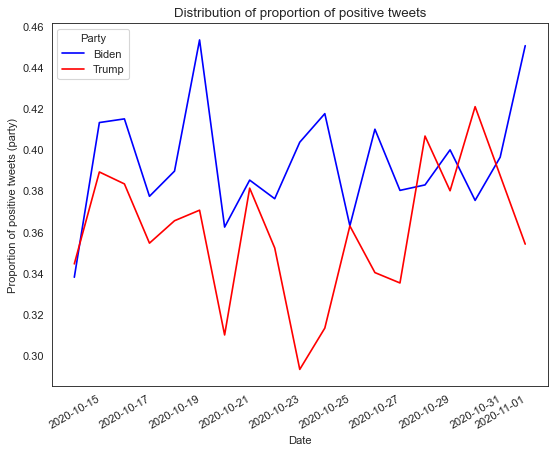

In [45]:
proportion_data = pd.concat([week1_positive, week2_positive, week3_positive], ignore_index=True)
colors = ['#0000FF', '#FF0000']
sns.set_palette(sns.color_palette(colors))

figure(figsize = (8, 6), dpi=80)
g = sns.lineplot(data = proportion_data, 
                x = 'created_at', y = 'proportion_ds', 
                 hue = 'ds', legend=False).set(title='Distribution of proportion of positive tweets')
plt.xlabel('Date')
plt.ylabel('Proportion of positive tweets (party)')
plt.xticks(rotation=30)
plt.legend(title = 'Party', loc='upper left', labels=['Biden', 'Trump'])
plt.show(g)

**Sentiments by state and party**

In [59]:
def CleanStates(data):
    df = data.copy()
    valid_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 
                   'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
                   'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
                   'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
                   'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'VI', 'WA', 'WV', 'WI', 'WY']
    df = df[df['state_code'].isin(valid_states)]
    return df

In [63]:
week1_sent = CleanStates(week1_sentiments)
week2_sent = CleanStates(week2_sentiments)
week3_sent = CleanStates(week3_sentiments)
print(week1_sent.shape, week2_sent.shape, week3_sent.shape)

(5364, 27) (4949, 27) (4296, 27)


In [64]:
week1_state = week1_sent.groupby(['ds', 'state_code'])['vader_polarity'].mean().reset_index()
week2_state = week2_sent.groupby(['ds', 'state_code'])['vader_polarity'].mean().reset_index()
week3_state = week3_sent.groupby(['ds', 'state_code'])['vader_polarity'].mean().reset_index()
week1_state.head()

,ds,state_code,vader_polarity
0,biden,AK,0.13
1,biden,AL,0.16
2,biden,AR,-0.23
3,biden,AZ,0.02
4,biden,CA,0.05


Text(0.5, 0.98, 'Distribution of polarity by state (Oct 15 - 19)')

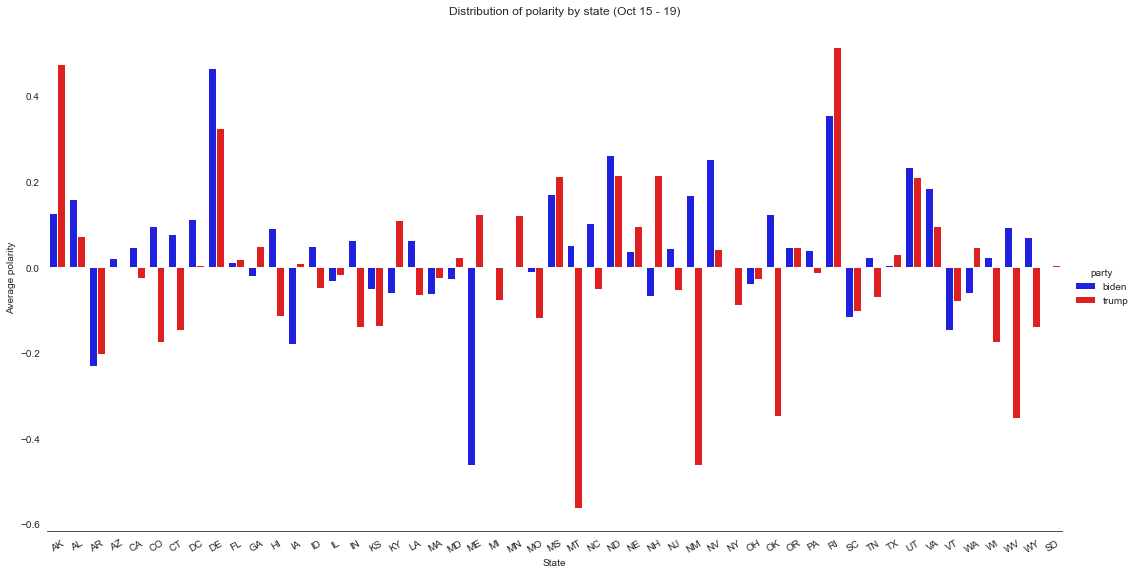

In [65]:
colors = ['#0000FF', '#FF0000']
sns.set_palette(sns.color_palette(colors))

g = sns.catplot(data = week1_state, 
               kind = 'bar', 
               x = 'state_code', y = 'vader_polarity', hue = 'ds', 
               height=8, aspect=15/8)
g.despine(left=True)
g.set_axis_labels('State', 'Average polarity')
g._legend.set_title('party')
g.set_xticklabels(rotation=30)
g.fig.subplots_adjust(top=0.95) 
g.fig.suptitle('Distribution of polarity by state (Oct 15 - 19)')

Text(0.5, 0.98, 'Distribution of sentiment polarity by state (Oct 20 - Oct 26)')

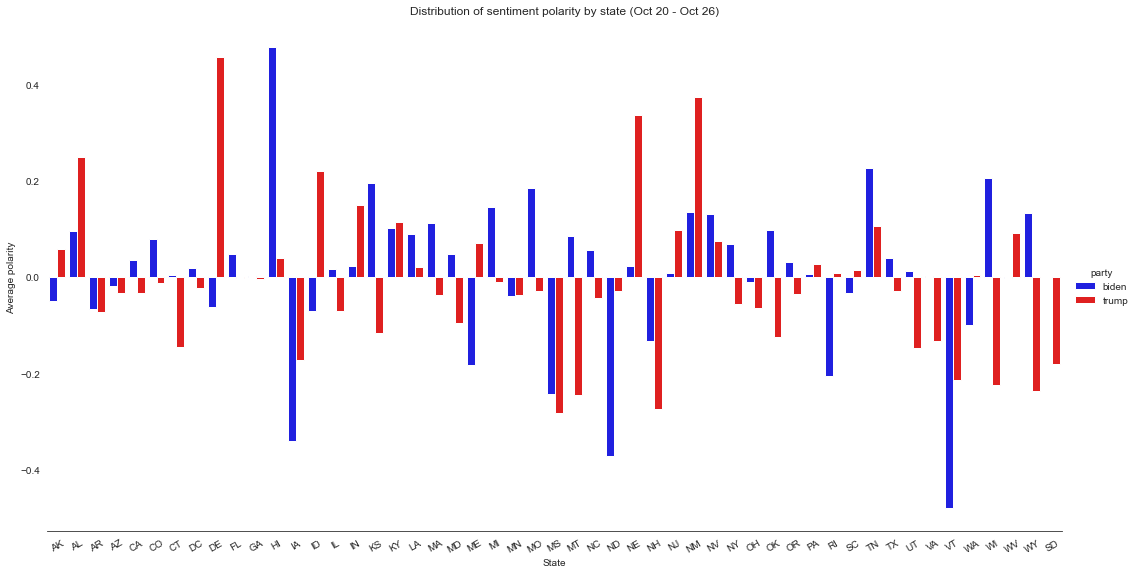

In [66]:
colors = ['#0000FF', '#FF0000']
sns.set_palette(sns.color_palette(colors))

g = sns.catplot(data = week2_state, 
               kind = 'bar', 
               x = 'state_code', y = 'vader_polarity', hue = 'ds', 
               height=8, aspect=15/8)
g.despine(left=True)
g.set_axis_labels('State', 'Average polarity')
g._legend.set_title('party')
g.set_xticklabels(rotation=30)
g.fig.subplots_adjust(top=0.95) 
g.fig.suptitle('Distribution of sentiment polarity by state (Oct 20 - Oct 26)')

Text(0.5, 0.98, 'Distribution of sentiment polarity by state (Oct 27 - Nov 2)')

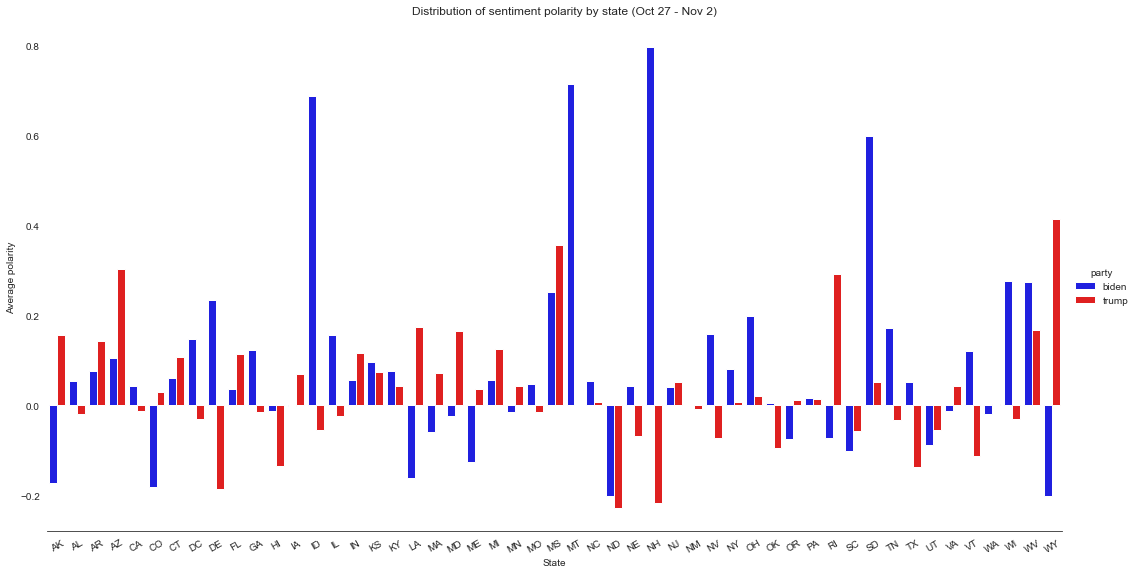

In [67]:
colors = ['#0000FF', '#FF0000']
sns.set_palette(sns.color_palette(colors))

g = sns.catplot(data = week3_state, 
               kind = 'bar', 
               x = 'state_code', y = 'vader_polarity', hue = 'ds', 
               height=8, aspect=15/8)
g.despine(left=True)
g.set_axis_labels('State', 'Average polarity')
g._legend.set_title('party')
g.set_xticklabels(rotation=30)
g.fig.subplots_adjust(top=0.95) 
g.fig.suptitle('Distribution of sentiment polarity by state (Oct 27 - Nov 2)')

In [69]:
overall_sentiments = pd.concat([week1_sent, week2_sent, week3_sent], ignore_index=True)
overall_sentiments.shape

(14609, 27)

In [70]:
overall_state = overall_sentiments.groupby(['ds', 'state_code'])['vader_polarity'].mean().reset_index()
overall_state.head()

,ds,state_code,vader_polarity
0,biden,AK,-0.08
1,biden,AL,0.10
2,biden,AR,-0.12
3,biden,AZ,0.03
4,biden,CA,0.04


In [71]:
overall_state['state_code'].nunique()

51

Text(0.5, 0.98, 'Distribution of sentiment polarity by state (Oct 15 - Nov 2)')

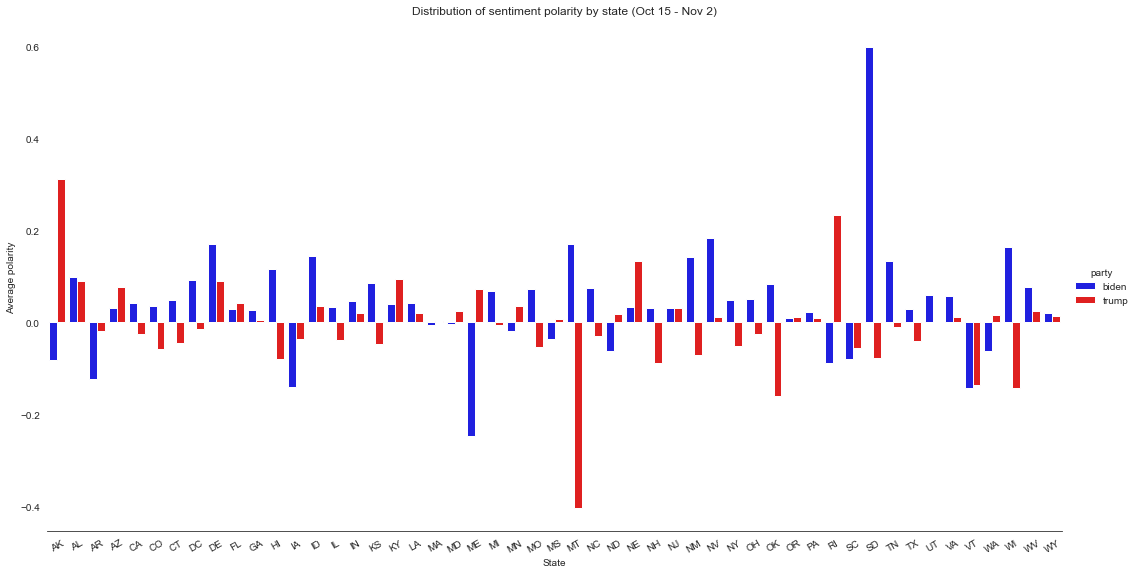

In [72]:
colors = ['#0000FF', '#FF0000']
sns.set_palette(sns.color_palette(colors))

g = sns.catplot(data = overall_state, 
               kind = 'bar', 
               x = 'state_code', y = 'vader_polarity', hue = 'ds', 
               height=8, aspect=15/8)
g.despine(left=True)
g.set_axis_labels('State', 'Average polarity')
g._legend.set_title('party')
g.set_xticklabels(rotation=30)
g.fig.subplots_adjust(top=0.95) 
g.fig.suptitle('Distribution of sentiment polarity by state (Oct 15 - Nov 2)')

### Evaluation: using sampled tweets from the post-election period (date: Nov 4 2020 - Nov 8 2020)

In [40]:
post = pd.read_csv('sample_post.csv', )
post.head()

,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_lang,tweet_new,tweet_token,ds
0,2020-11-06 15:44:24,"The tragedy of #Trump isn’t that he can’t be redeemed, it is that he refuses to be redeemed.",0,0,418980479,75,"Los Angeles, CA",34.05,-118.24,Los Angeles,United States,North America,California,CA,en,the tragedy of trump isn t that he can t be redeemed it is that he refuses to be redeemed,"['tragedi', 'trump', 'redeem', 'refus', 'redeem', '']",trump
1,2020-11-04 20:45:55,"#TwitterCensorship censors #Trump 's #tweets about '#disappearing' #ballots https://t.co/GoWHf0qTfo via @nypost &amp;#nypost should know they were censored too. Ask @tedcruz interviewed Twitter RepDisgusts me since they are a public forum, but act as if they are not. RANDOM RULEs",0,0,483626038,196,USA,39.78,-100.45,NaN,United States,North America,NaN,NaN,en,twittercensorship censors trump s tweets about disappearing ballots via amp nypost should know they were censored too ask interviewed twitter repdisgusts me since they are a public forum but act as if they are not random rules,"['twittercensorship', 'censor', 'trump', 'tweet', 'disappear', 'ballot', 'via', 'amp', 'nypost', 'know', 'censor', 'ask', 'interview', 'twitter', 'repdisgust', 'sinc', 'public', 'forum', 'act', 'random', 'rule']",trump
2,2020-11-07 21:37:06,How long until Trump is announced as the winner? Everyone guess!! #MAGA2020 #MAGA #TRUMP,4,2,-2147483648,414,"Jefferson, GA",29.83,-94.17,NaN,United States,North America,Texas,TX,en,how long until trump is announced as the winner everyone guess maga2020 maga trump,"['long', 'trump', 'announc', 'winner', 'everyon', 'guess', 'maga2020', 'maga', 'trump']",trump
3,2020-11-04 20:30:02,#China's yuan has worst fall in years before recovering on #election swings. The yuan plunged 1.4% against the US #dollar when early results showed #Trump in a competitive race with former VP Joe #Biden -- but then it recovered WHY? China likes Biden?\nhttps://t.co/AKkxHD8ghb,0,0,-2147483648,1531,USA,39.78,-100.45,NaN,United States,North America,NaN,NaN,en,china s yuan has worst fall in years before recovering on election swings the yuan plunged 1 4 against the us dollar when early results showed trump in a competitive race with former vp joe biden but then it recovered why china likes biden,"['china', 'yuan', 'worst', 'fall', 'year', 'recov', 'elect', 'swing', 'yuan', 'plung', '1', '4', 'u', 'dollar', 'earli', 'result', 'show', 'trump', 'competit', 'race', 'former', 'vp', 'joe', 'biden', 'recov', 'china', 'like', 'biden', '']",trump
4,2020-11-06 22:08:01,#PaulaWhite is on a mission to cast the demons out for #DonaldTrump to the tune of an #Eminem song with the #cat from those memes. 😂😂😂😂 #diaryofaprdiva #notmypresident #trump https://t.co/B7QQcwqgv9,0,0,-2147483648,68,"Atlanta, GA",33.75,-84.39,Atlanta,United States,North America,Georgia,GA,en,paulawhite is on a mission to cast the demons out for donaldtrump to the tune of an eminem song with the cat from those memes diaryofaprdiva notmypresident trump,"['paulawhit', 'mission', 'cast', 'demon', 'donaldtrump', 'tune', 'eminem', 'song', 'cat', 'meme', 'diaryofaprdiva', 'notmypresid', 'trump', '']",trump


In [41]:
post_sentiments = sentiment_analysis(post)
post_sentiments = sentiment_analysis_vader(post_sentiments)
post_sentiments = sentiment_analysis_vader(post_sentiments, clean=False)
post_sentiments.head()

,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,...,ds,blob_polarity,blob_subjectivity,blob_sentiment,vader_clean_scores,vader_clean_polarity,vader_clean_sentiment,vader_scores,vader_polarity,vader_sentiment
0,2020-11-06 15:44:24,"The tragedy of #Trump isn’t that he can’t be redeemed, it is that he refuses to be redeemed.",0,0,418980479,75,"Los Angeles, CA",34.05,-118.24,Los Angeles,...,trump,0.00,0.00,neutral,"{'neg': 0.183, 'neu': 0.625, 'pos': 0.192, 'compound': -0.2023}",-0.20,negative,"{'neg': 0.183, 'neu': 0.625, 'pos': 0.192, 'compound': -0.2023}",-0.20,negative
1,2020-11-04 20:45:55,"#TwitterCensorship censors #Trump 's #tweets about '#disappearing' #ballots https://t.co/GoWHf0qTfo via @nypost &amp;#nypost should know they were censored too. Ask @tedcruz interviewed Twitter RepDisgusts me since they are a public forum, but act as if they are not. RANDOM RULEs",0,0,483626038,196,USA,39.78,-100.45,NaN,...,trump,0.12,0.28,positive,"{'neg': 0.081, 'neu': 0.919, 'pos': 0.0, 'compound': -0.2263}",-0.23,negative,"{'neg': 0.075, 'neu': 0.925, 'pos': 0.0, 'compound': -0.2263}",-0.23,negative
2,2020-11-07 21:37:06,How long until Trump is announced as the winner? Everyone guess!! #MAGA2020 #MAGA #TRUMP,4,2,-2147483648,414,"Jefferson, GA",29.83,-94.17,NaN,...,trump,-0.05,0.40,negative,"{'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.5859}",0.59,positive,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.658}",0.66,positive
3,2020-11-04 20:30:02,#China's yuan has worst fall in years before recovering on #election swings. The yuan plunged 1.4% against the US #dollar when early results showed #Trump in a competitive race with former VP Joe #Biden -- but then it recovered WHY? China likes Biden?\nhttps://t.co/AKkxHD8ghb,0,0,-2147483648,1531,USA,39.78,-100.45,NaN,...,trump,-0.30,0.43,negative,"{'neg': 0.057, 'neu': 0.83, 'pos': 0.113, 'compound': 0.3612}",0.36,positive,"{'neg': 0.053, 'neu': 0.834, 'pos': 0.113, 'compound': 0.4329}",0.43,positive
4,2020-11-06 22:08:01,#PaulaWhite is on a mission to cast the demons out for #DonaldTrump to the tune of an #Eminem song with the #cat from those memes. 😂😂😂😂 #diaryofaprdiva #notmypresident #trump https://t.co/B7QQcwqgv9,0,0,-2147483648,68,"Atlanta, GA",33.75,-84.39,Atlanta,...,trump,0.00,0.00,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral


In [42]:
post_sentiments['created_at'] = pd.to_datetime(post_sentiments['created_at'])
post_grouped = post_sentiments.groupby([post_sentiments['created_at'].dt.date, 'ds'])['vader_polarity'].mean().reset_index()
post_grouped.head()

,created_at,ds,vader_polarity
0,2020-11-04,biden,0.19
1,2020-11-04,trump,0.04
2,2020-11-05,biden,0.12
3,2020-11-05,trump,-0.06
4,2020-11-06,biden,0.07


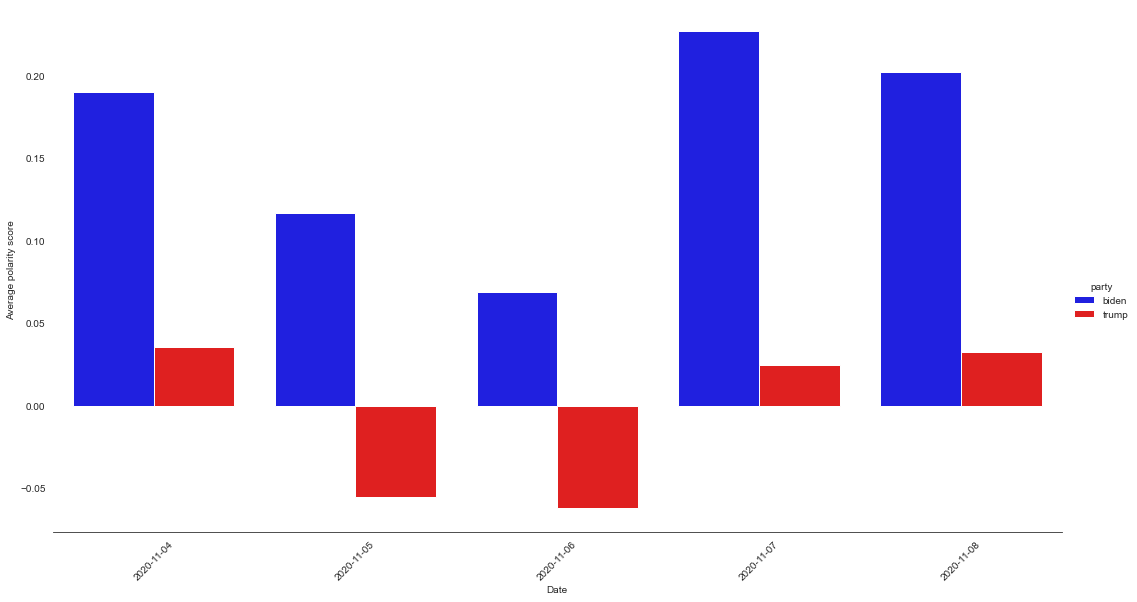

In [43]:
colors = ['#0000FF', '#FF0000']
sns.set_palette(sns.color_palette(colors))

g = sns.catplot(data = post_grouped, 
               kind = 'bar', 
               x = 'created_at', y = 'vader_polarity', hue = 'ds', 
                height=8, aspect=15/8)
g.despine(left=True)
g.set_axis_labels('Date', 'Average polarity score')
g._legend.set_title('party')
g.set_xticklabels(rotation=45)

In [ ]:
#proportion of positive/negative tweets
post_count = post_sentiments.groupby([post_sentiments['created_at'].dt.date, 'ds', 'vader_sentiment']).size().reset_index().rename(columns={0:'count'})
post_total = post_sentiments.groupby([post_sentiments['created_at'].dt.date, 'ds']).size().reset_index().rename(columns={0: 'total_ds'})
post_df = post_count.merge(post_total, how = 'left', on = ['created_at', 'ds'])
post_df['proportion_ds'] = post_df['count']/post_df['total_ds']
post_positive = post_df[post_df['vader_sentiment'] == 'positive']
post_positive